In [32]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm
import math
os.getcwd()


'C:\\Users\\ebc15\\MLE-9\\assignments\\Untitled Folder'

EDA and Data Lineage of DNA Visualization Capstone 

References

Source of data - referenced in https://www.ncbi.nlm.nih.gov/data-hub/taxonomy/57068/ (https://www.ncbi.nlm.nih.gov/data-hub/taxonomy/57068/)

https://github.com/gigascience/paper-zhang2014 (github.com)

https://www.nature.com/articles/518147a (https://www.nature.com/articles/518147a)

Transcription Factors of the Alx Family: Evolutionarily Conserved Regulators of Deuterostome Skeletogenesis Khor JM, Ettensohn CA Frontiers in Genetics Nov2020 Vol 11 p1-15

The calmodulin pathway and evolution of elongated beak morphology in Darwin's finches Abzhanov A. et al Nature Vol 442 3Aug2006 p563-567

Evolution of Darwin's finches and their beaks revealed by genome sequencing Lamichhaney S et al Nature Vol518 19Feb2015 p371-375


In [5]:
#1.
import re
import glob


In [6]:

#2.
#genbank ALX data

training_pathcomplete='C:/Users/ebc15/MLE-9/assignments/Untitled Folder/birdDNAalxGene/GenBankDNA_ALXgeneSeq/'
imgs_array=[]
for file in glob.glob(training_pathcomplete+'/*.txt'):
        imgs_array.append(file)


In [7]:

#3.
birdBeakTypeCons=[0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0]


In [8]:

#4.
def pre_readGB(fn):
    gbFile=[]
    fileObj=open(fn,'r')
    for r in fileObj:
        gbFile.append(r)
    return gbFile


In [9]:

#5.
def readGB(fn):
    startIdxDNA=0
    endIdxDNA=0
    startIdxT=0
    endIdxT=0
    startIdxP=0
    endIdxP=0
    for idx,r in enumerate(fn):
        if not(r.find('ORIGIN')==-1): 
            startIdxDNA=idx
            endIdxT=idx
        elif not(r.find('//')==-1):
            endIdxDNA=idx
        elif not(r.find('translation')==-1):
            startIdxT=idx
        elif not(r.find('product')==-1):
            startIdxP=idx
        elif not(r.find('protein')==-1):
            endIdxP=idx
    return [fn[startIdxP:endIdxP],fn[startIdxDNA:endIdxDNA],fn[startIdxT:endIdxT]]


In [10]:

#6.
#regular expressions \A ---> matches at start of string \s matches whitespace \d matches numbers
import re
def filterLines(dna):
    dnaSeq=[]
    for idx,i in enumerate(dna):
        if i.find('ORIGIN')==-1:
            dnaSeq.append(re.split(r'\s',i.strip())[1:])
    dnaStr=''
    for i in dnaSeq:#join strings in csv list
        for j in i:
            dnaStr+=j
    return dnaStr


In [11]:

#7.
dnaSeqAll=[filterLines(readGB(pre_readGB(i))[1]) for i in imgs_array]


In [12]:

#8.
def export_in_data(fn,fn1):
    #datapath = 'C:\\Users\\ebc15\MLE-9\\assignments\\Untitled Folder\\data///'
    #datapath='/content/sample_data/birdDNA/'
    datapath='C:\\documents_aug2022\\DNAdata'
    infn=fn+'.txt'
    datapath_findata = os.path.join(datapath,infn)
    print('datapath',datapath)
    if not os.path.exists(datapath_findata):
        pd.DataFrame(fn1).to_csv(datapath_findata, index=False)


In [13]:

#9.
def stopCodonCheck(dnaData):  
    taaStopCodon=[]
    for i in dnaData:
        if i.find('taa')>=0:
            taaStopCodon.append(1)
            sum=0
    for i in taaStopCodon:
        if i==1:
            sum+=1
    return sum


In [14]:

#10.
stopCodonCheck(dnaSeqAll)


44

In [15]:

#11.
def bufferDNA(dna):
    buffDNA=[]
    #identify min-max
    pdLens=pd.Series([len(i) for i in dna])
    dna_delta=pdLens.max()-pdLens.min()
    stopCodonBuff='taa'*dna_delta
    for idx,i in enumerate(dna):
        if len(i)<pdLens.max():
            buffDNA.append(i+stopCodonBuff[:pdLens.max()-len(i)])
        else:
            buffDNA.append(i)
  #check lengths
    len0=0
    barray=[]
    for idx,i in enumerate(buffDNA):
        if len0==0:
            len0=len(i)
        else:
            barray.append(len(i)==len0)
    sameLength=0
    for idx,i in enumerate(barray):
        if i:
            sameLength+=1
    if sameLength==len(dna)-1:
        return buffDNA
    else:
        return 'error'


In [16]:

#12.
buffDNA=bufferDNA(dnaSeqAll)


In [17]:

#13.
def dnaInt(dnaCo):
    dnaVector=[]
    for i in dnaCo:
        dnaStr=''
        for j in i:
            if j=='A' or j=='a':
                dnaStr+='1'
            elif j=='C' or j=='c':
                dnaStr+='2'
            elif j=='T' or j=='t':
                dnaStr+='3'
            elif j=='G' or j=='g':
                dnaStr+='4'
            elif j=='N' or j=='n':
                dnaStr+='0'
            else:
                print('error')
        dnaVector.append(dnaStr)
    return dnaVector


In [18]:

#14.
dnaIntBuff=dnaInt(buffDNA)


In [19]:

#15.
def checkDNAlength(dnaData):
    booleanDNA=[]
    for idx in range(len(dnaData)-1):
        if len(dnaData[idx])==len(dnaData[idx+1]):
            booleanDNA.append(True)
        else:
            booleanDNA.append(False)
    return booleanDNA


In [20]:

#16.
all(checkDNAlength(dnaIntBuff))


True

In [21]:

#17aofe
import pandas as pd
dnaDataFrame=pd.DataFrame({'dna':dnaIntBuff,'bird':[re.split('birdDNA',i)[1] for i in imgs_array],'beakType':birdBeakTypeCons})


In [22]:
dnaDataFrame

,dna,bird,beakType
0,1313323233341131434311313411113421422344131322...,alxGene/GenBankDNA_ALXgeneSeq\americanCrowALXg...,0
1,1111113214421344411434223234414241132224444234...,alxGene/GenBankDNA_ALXgeneSeq\AnnaHumGenBankAL...,1
2,2322223421433311314234223331114144412133313344...,alxGene/GenBankDNA_ALXgeneSeq\baldEagleALXgene...,0
3,4112223121113142223433442323143342123133343441...,alxGene/GenBankDNA_ALXgeneSeq\barnOwlALXgeneNW...,0
4,1132311423333423323331322123113413423131133111...,alxGene/GenBankDNA_ALXgeneSeq\brownMesiteALXge...,0
5,4131124222242414413143414443313333333133333333...,alxGene/GenBankDNA_ALXgeneSeq\carmine_bee_eate...,0
6,1223241422344411134232243423244422244344112414...,alxGene/GenBankDNA_ALXgeneSeq\chickenALXgeneNC...,0
7,3422323323321341111123134114414444114342232344...,alxGene/GenBankDNA_ALXgeneSeq\chimneySwiftALXg...,1
8,4443433342342433122411314442421121424133233242...,alxGene/GenBankDNA_ALXgeneSeq\cormorantALXgene...,0
9,2124322444323234224424144312243312144434441124...,alxGene/GenBankDNA_ALXgeneSeq\CraneGenBankALXD...,0


EDA

Unsupervised clustering via OPTICS to estimate number of clusters by beak type


In [23]:
#Unsupervised clustering
#18 OPTICS with algorithm=balltree
from sklearn.cluster import OPTICS


In [24]:
#19 creating DNA x array for unsupervised clustering
narrayX_List=[list(i) for i in dnaDataFrame.dna]



In [25]:
#20 fitting OPTICS on rifleman bird sample
opCluster=OPTICS(min_samples=2,algorithm='ball_tree').fit(narrayX_List)


In [26]:
#21 estimating clusters
opCluster.labels_ #gives 4 clusters


array([ 0,  2,  2,  2,  0,  0, -1,  0,  1,  1,  1,  0,  0,  0,  0,  0,  0,
        2,  0,  2,  0,  0,  1,  0,  2,  2,  1,  0,  0,  2,  0,  0,  0,  0,
        0,  2,  1,  2,  0,  2,  2,  1, -1,  1])

OPTICS unsupervised clustering gives four clusters compared with 8 classes as labeled manually. 

Adding both classifications in dnaDataFrame

In [27]:
#22 adding manual classification of beak type with 8 classes and 4 classes
dnaDataFrame['beakTypeMulticlass']=[2,0,3,3,2,2,2,1,4,4,5,2,2,2,5,5,4,6,1,6,3,2,6,2,7,6,3,4,3,3,2,4,0,2,6,2,7,1,7,2,3,2,1,7]
dnaDataFrame['beakTypeFour']=[2,1,3,3,2,2,2,1,4,4,4,2,2,2,4,4,4,4,1,4,3,2,4,2,2,4,3,4,3,3,2,4,1,2,4,2,2,1,2,2,3,2,1,2]


In [28]:
#23
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.layers import TextVectorization
import numpy as np

def nu_tensor(dna_file):
    nu_tensor=[]
    for i in dna_file:
        tmp_narray=[]
        for j in i:
            tmp_narray.append(tf.convert_to_tensor(int(j)))
        nu_tensor.append(tmp_narray)
    return nu_tensor    


In [29]:
#24
#two beak classes, all birds
narray_X = [np.array(i) for i in dnaDataFrame.dna]
narray_y = [np.array(i) for i in dnaDataFrame['beakTypeFour']]


In [30]:
#25
tensorX_33000=nu_tensor([i.tolist() for i in narray_X])
tensorY_33000=[tf.convert_to_tensor(i) for i in narray_y]


In [35]:
#importing FGF10 fibroblast growth factor 10
fgf10_pre=pd.read_csv('C:\\Users\\ebc15\\MLE-9\\assignments\\Untitled Folder\\birdDNAalxGene\\ALXReg\FGF10_preliminary.csv')

In [37]:
dnaDataFrame['fgf10']=fgf10_pre.iloc[:,1]

In [38]:
dnaDataFrame

,dna,bird,beakType,beakTypeMulticlass,beakTypeFour,fgf10
0,1313323233341131434311313411113421422344131322...,alxGene/GenBankDNA_ALXgeneSeq\americanCrowALXg...,0,2,2,MCKWILTNGASAFSHLPCCCLLLVFLVSSVPVTCHDLGQDMLSPEA...
1,1111113214421344411434223234414241132224444234...,alxGene/GenBankDNA_ALXgeneSeq\AnnaHumGenBankAL...,1,0,1,MCKWILTNGGSAFSHLPCCCLLLLFLVSSVPVTCHDLGQDMLSPEA...
2,2322223421433311314234223331114144412133313344...,alxGene/GenBankDNA_ALXgeneSeq\baldEagleALXgene...,0,3,3,MCKWILTNGASAFSHLPRCCLLLLFLASSVPVTCHDLGQDMLSPEA...
3,4112223121113142223433442323143342123133343441...,alxGene/GenBankDNA_ALXgeneSeq\barnOwlALXgeneNW...,0,3,3,MCKWILTNGASAFSHLPCCCLLLLFLVSSVPVTCHDLGQDMLSPEA...
4,1132311423333423323331322123113413423131133111...,alxGene/GenBankDNA_ALXgeneSeq\brownMesiteALXge...,0,2,2,NaN
5,4131124222242414413143414443313333333133333333...,alxGene/GenBankDNA_ALXgeneSeq\carmine_bee_eate...,0,2,2,NaN
6,1223241422344411134232243423244422244344112414...,alxGene/GenBankDNA_ALXgeneSeq\chickenALXgeneNC...,0,2,2,MCKWILTNGASAFSHLPCCCLLLLFLVSSVPVTCHDLGQDMLSPEA...
7,3422323323321341111123134114414444114342232344...,alxGene/GenBankDNA_ALXgeneSeq\chimneySwiftALXg...,1,1,1,MCKWILTNGASAFSHLPCCCLLLLFLVSSVPVPCHDLGQDMLSPEA...
8,4443433342342433122411314442421121424133233242...,alxGene/GenBankDNA_ALXgeneSeq\cormorantALXgene...,0,4,4,MNKKGKVYGSKEFNSDCKLKERIEENGYNTYASLNWKHNGRQMFVA...
9,2124322444323234224424144312243312144434441124...,alxGene/GenBankDNA_ALXgeneSeq\CraneGenBankALXD...,0,4,4,NaN


In [40]:
dnaDataFrame.iloc[:,[0,5]]

,dna,fgf10
0,1313323233341131434311313411113421422344131322...,MCKWILTNGASAFSHLPCCCLLLVFLVSSVPVTCHDLGQDMLSPEA...
1,1111113214421344411434223234414241132224444234...,MCKWILTNGGSAFSHLPCCCLLLLFLVSSVPVTCHDLGQDMLSPEA...
2,2322223421433311314234223331114144412133313344...,MCKWILTNGASAFSHLPRCCLLLLFLASSVPVTCHDLGQDMLSPEA...
3,4112223121113142223433442323143342123133343441...,MCKWILTNGASAFSHLPCCCLLLLFLVSSVPVTCHDLGQDMLSPEA...
4,1132311423333423323331322123113413423131133111...,NaN
5,4131124222242414413143414443313333333133333333...,NaN
6,1223241422344411134232243423244422244344112414...,MCKWILTNGASAFSHLPCCCLLLLFLVSSVPVTCHDLGQDMLSPEA...
7,3422323323321341111123134114414444114342232344...,MCKWILTNGASAFSHLPCCCLLLLFLVSSVPVPCHDLGQDMLSPEA...
8,4443433342342433122411314442421121424133233242...,MNKKGKVYGSKEFNSDCKLKERIEENGYNTYASLNWKHNGRQMFVA...
9,2124322444323234224424144312243312144434441124...,NaN


In [45]:
#adding M, methionine, start codon as placeholder in missing data rows
dnaDataFrame.iloc[[4,5,9,10,12,14,20,31,32,33,34,35,36,37,38,39,40,41],5]="M"

In [46]:
dnaDataFrame.iloc[:,[0,5]]

,dna,fgf10
0,1313323233341131434311313411113421422344131322...,MCKWILTNGASAFSHLPCCCLLLVFLVSSVPVTCHDLGQDMLSPEA...
1,1111113214421344411434223234414241132224444234...,MCKWILTNGGSAFSHLPCCCLLLLFLVSSVPVTCHDLGQDMLSPEA...
2,2322223421433311314234223331114144412133313344...,MCKWILTNGASAFSHLPRCCLLLLFLASSVPVTCHDLGQDMLSPEA...
3,4112223121113142223433442323143342123133343441...,MCKWILTNGASAFSHLPCCCLLLLFLVSSVPVTCHDLGQDMLSPEA...
4,1132311423333423323331322123113413423131133111...,M
5,4131124222242414413143414443313333333133333333...,M
6,1223241422344411134232243423244422244344112414...,MCKWILTNGASAFSHLPCCCLLLLFLVSSVPVTCHDLGQDMLSPEA...
7,3422323323321341111123134114414444114342232344...,MCKWILTNGASAFSHLPCCCLLLLFLVSSVPVPCHDLGQDMLSPEA...
8,4443433342342433122411314442421121424133233242...,MNKKGKVYGSKEFNSDCKLKERIEENGYNTYASLNWKHNGRQMFVA...
9,2124322444323234224424144312243312144434441124...,M


Referenced https://www.ncbi.nlm.nih.gov/Taxonomy/Utils/wprintgc.cgi?chapter=tgencodes#SG2
to translate amino acid abbreviations.

In [53]:
dnaDataFrame.fgf10[0]

'MCKWILTNGASAFSHLPCCCLLLVFLVSSVPVTCHDLGQDMLSPEATNSSSSSSSSFPSSFSSPSSAGRHVRSYNHLQGDVRKRKLYSYNKYFLKIEKNGKVSGTKKENCPFSILEITSVEIGVVAVKSVKSNYYLAMNKKGKVYGSKEFNSDCKLKERIEENGYNTYASLNWKHNGRQMFVALNGRGTTKRGQKTRRKNTSAHFLPMVVMS'

In [64]:
def aa_number(aa_file): #dnaDataFrame.fgf10
    new_protein_sequence=[]
    for sequence in aa_file:
        number_sequence=''
        for aa in sequence:
            if aa=="A":
                number_sequence+=('1')
            elif aa=="C":
                number_sequence+=('2')
            elif aa=="D":
                number_sequence+=('3')
            elif aa=="E":
                number_sequence+=('4')
            elif aa=="F":
                number_sequence+=('5')
            elif aa=="G":
                number_sequence+=('6')
            elif aa=="H":
                number_sequence+=('7')
            elif aa=="I":
                number_sequence+=('8')
            elif aa=="K":
                number_sequence+=('9')
            elif aa=="L":
                number_sequence+=('10')
            elif aa=="M":
                number_sequence+=('11')
            elif aa=="N":
                number_sequence+=('12')
            elif aa=="P":
                number_sequence+=('13')
            elif aa=="Q":
                number_sequence+=('14')
            elif aa=="R":
                number_sequence+=('15')
            elif aa=="S":
                number_sequence+=('16')
            elif aa=="T":
                number_sequence+=('17')
            elif aa=="V":
                number_sequence+=('18')
            elif aa=="W":
                number_sequence+=('19')
            elif aa=="Y":
                number_sequence+=('20')
        new_protein_sequence.append(number_sequence)
    return new_protein_sequence
        

In [65]:
fgf10_number=aa_number(dnaDataFrame.fgf10)

In [66]:
len(fgf10_number)

44

In [67]:
dnaDataFrame["fgf10_number"]=fgf10_number

In [74]:
import decimal

In [68]:
dnaDataFrame

,dna,bird,beakType,beakTypeMulticlass,beakTypeFour,fgf10,fgf10_number
0,1313323233341131434311313411113421422344131322...,alxGene/GenBankDNA_ALXgeneSeq\americanCrowALXg...,0,2,2,MCKWILTNGASAFSHLPCCCLLLVFLVSSVPVTCHDLGQDMLSPEA...,1129198101712611615167101322210101018510181616...
1,1111113214421344411434223234414241132224444234...,alxGene/GenBankDNA_ALXgeneSeq\AnnaHumGenBankAL...,1,0,1,MCKWILTNGGSAFSHLPCCCLLLLFLVSSVPVTCHDLGQDMLSPEA...,1129198101712661615167101322210101010510181616...
2,2322223421433311314234223331114144412133313344...,alxGene/GenBankDNA_ALXgeneSeq\baldEagleALXgene...,0,3,3,MCKWILTNGASAFSHLPRCCLLLLFLASSVPVTCHDLGQDMLSPEA...,1129198101712611615167101315221010101051011616...
3,4112223121113142223433442323143342123133343441...,alxGene/GenBankDNA_ALXgeneSeq\barnOwlALXgeneNW...,0,3,3,MCKWILTNGASAFSHLPCCCLLLLFLVSSVPVTCHDLGQDMLSPEA...,1129198101712611615167101322210101010510181616...
4,1132311423333423323331322123113413423131133111...,alxGene/GenBankDNA_ALXgeneSeq\brownMesiteALXge...,0,2,2,M,11
5,4131124222242414413143414443313333333133333333...,alxGene/GenBankDNA_ALXgeneSeq\carmine_bee_eate...,0,2,2,M,11
6,1223241422344411134232243423244422244344112414...,alxGene/GenBankDNA_ALXgeneSeq\chickenALXgeneNC...,0,2,2,MCKWILTNGASAFSHLPCCCLLLLFLVSSVPVTCHDLGQDMLSPEA...,1129198101712611615167101322210101010510181616...
7,3422323323321341111123134114414444114342232344...,alxGene/GenBankDNA_ALXgeneSeq\chimneySwiftALXg...,1,1,1,MCKWILTNGASAFSHLPCCCLLLLFLVSSVPVPCHDLGQDMLSPEA...,1129198101712611615167101322210101010510181616...
8,4443433342342433122411314442421121424133233242...,alxGene/GenBankDNA_ALXgeneSeq\cormorantALXgene...,0,4,4,MNKKGKVYGSKEFNSDCKLKERIEENGYNTYASLNWKHNGRQMFVA...,1112996918206169451216329109415844126201217201...
9,2124322444323234224424144312243312144434441124...,alxGene/GenBankDNA_ALXgeneSeq\CraneGenBankALXD...,0,4,4,M,11


In [82]:
#matrix graph
matrix_list=[]
for i in dnaDataFrame.dna:
    tmp_list=[]
    upper_limit=math.sqrt(len(i))
    for a in range(int(upper_limit)):
        tmp_list.append(i[a*int(upper_limit):(a+1)*int(upper_limit)])
    matrix_list.append(tmp_list)
        

In [83]:
matrix_list[0]

['13133232333411314343113134111134214223441313223311221344311212343333131113134431134113133111322343431134212131341111131214423332341412134214443223332342333421113213232121214431411331',
 '32123111232342333321341114414423214233213233234233411114331211311333331222111213223342112114234323443123331444141213432233231331223323423411423311411132122134211442311114414142111343',
 '41411331333331322323143114214123242132331141143222213223433221421131333422141332332114213321334411211111334414323343143123321343142141133222333213442233414131213413113323432134323323',
 '11341443333214313311141114433223234233214333114322343422144314111422123323312232231241322114241143311123213344421113323211441141144112111113444121141414413443332311332212143441111223',
 '31333431331323133314111443414114121131214111133411341121214343311141141331323313412114214431433411314131414413132111344411131113134411333332332111134141123111143414411123414144114321',
 '311132343341223131111132133331213143343333342111321332342231341

In [84]:
dnaDataFrame["matrixDNA"]=matrix_list

In [86]:
new_dna_data_frame=pd.DataFrame({"matrixDNA":dnaDataFrame.matrixDNA[0]})

In [87]:
new_dna_data_frame

,matrixDNA
0,1313323233341131434311313411113421422344131322...
1,3212311123234233332134111441442321423321323323...
2,4141133133333132232314311421412324213233114114...
3,1134144333321431331114111443322323423321433311...
4,3133343133132313331411144341411412113121411113...
...,...
177,3341414444334412141311311311311311311311311311...
178,1131131131131131131131131131131131131131131131...
179,3113113113113113113113113113113113113113113113...
180,1311311311311311311311311311311311311311311311...


In [92]:
def cg_ratio(fn):
    cg_ratio=[]
    for i in fn:
        cg_sum=0
        for j in i:
            if j=='2' or j=='4':
                cg_sum+=1
        cg_ratio.append(cg_sum/len(i))
    return cg_ratio

In [93]:
new_dna_data_frame["cgratio"]=cg_ratio(new_dna_data_frame.matrixDNA)

In [94]:
new_dna_data_frame

,matrixDNA,cgratio
0,1313323233341131434311313411113421422344131322...,0.335165
1,3212311123234233332134111441442321423321323323...,0.395604
2,4141133133333132232314311421412324213233114114...,0.379121
3,1134144333321431331114111443322323423321433311...,0.412088
4,3133343133132313331411144341411412113121411113...,0.296703
...,...,...
177,3341414444334412141311311311311311311311311311...,0.054945
178,1131131131131131131131131131131131131131131131...,0.000000
179,3113113113113113113113113113113113113113113113...,0.000000
180,1311311311311311311311311311311311311311311311...,0.000000


C:\Users\ebc15\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


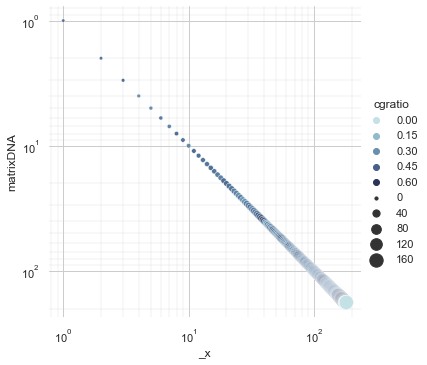

In [95]:
#https://seaborn.pydata.org/examples/scatterplot_sizes.html
import seaborn as sns
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=new_dna_data_frame,
    x=range(len(new_dna_data_frame)), y=new_dna_data_frame.matrixDNA,
    hue="cgratio", size=new_dna_data_frame.index,
    palette=cmap, sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

In [96]:
new_dna_data_frame1=pd.DataFrame({"matrixDNA":dnaDataFrame.matrixDNA[1]})

In [97]:
new_dna_data_frame1["cgratio"]=cg_ratio(new_dna_data_frame1.matrixDNA)

C:\Users\ebc15\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


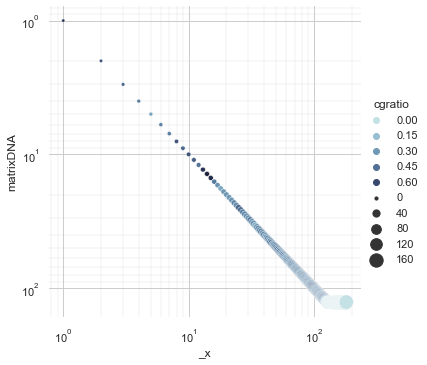

In [98]:
#https://seaborn.pydata.org/examples/scatterplot_sizes.html
import seaborn as sns
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=new_dna_data_frame1,
    x=range(len(new_dna_data_frame1)), y=new_dna_data_frame1.matrixDNA,
    hue="cgratio", size=new_dna_data_frame1.index,
    palette=cmap, sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)